In [344]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.colors as colors

In [269]:
#company summary

URL = 'https://api.census.gov/data/2018/abscs'

PARAMS = {
    'get': 'GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F',
    'for': 'state',
    'key' : '14289fd2fcc314628b968bb3c535f234569e6f9e'
}

r = requests.get(url = URL, params = PARAMS)
data = r.json()
df_company = pd.DataFrame(data[1:], columns=data[0])
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261397 entries, 0 to 261396
Data columns (total 32 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   GEO_ID            261397 non-null  object
 1   NAME              261397 non-null  object
 2   NAICS2017         261397 non-null  object
 3   NAICS2017_LABEL   261397 non-null  object
 4   SEX               261397 non-null  object
 5   SEX_LABEL         261397 non-null  object
 6   ETH_GROUP         261397 non-null  object
 7   ETH_GROUP_LABEL   261397 non-null  object
 8   RACE_GROUP        261397 non-null  object
 9   RACE_GROUP_LABEL  261397 non-null  object
 10  VET_GROUP         261397 non-null  object
 11  VET_GROUP_LABEL   261397 non-null  object
 12  EMPSZFI           261397 non-null  object
 13  EMPSZFI_LABEL     261397 non-null  object
 14  YEAR              261397 non-null  object
 15  FIRMPDEMP         261397 non-null  object
 16  FIRMPDEMP_F       171599 non-null  obj

In [270]:
df_company = df_company.drop(['NAICS2017', 'SEX', 'ETH_GROUP', 'RACE_GROUP', 'VET_GROUP', 'EMPSZFI', 'YEAR', 'FIRMPDEMP_F','FIRMPDEMP_S', 'FIRMPDEMP_S_F', 'RCPPDEMP_S', 'RCPPDEMP_F','RCPPDEMP_S_F', 'EMP_F','EMP_S', 'EMP_S_F', 'PAYANN_F','PAYANN_S', 'PAYANN_S_F', 'state'],axis=1)

In [271]:
df_company = df_company.rename(columns={'NAICS2017_LABEL': 'Industry', 'NAME': 'State', 'SEX_LABEL': 'Gender', 'ETH_GROUP_LABEL': 'Ethnicity', 'RACE_GROUP_LABEL': 'Race', 'VET_GROUP_LABEL': 'Veteran', 'EMPSZFI_LABEL': 'FirmSize', 'FIRMPDEMP': 'NumberFirms', 'RCPPDEMP': 'FirmSales', 'EMP':'NumberEmployees', 'PAYANN': 'AnnualPayroll'})

In [272]:
df_company = df_company.astype({'NumberFirms': int, 'FirmSales': int, 'NumberEmployees': int})

In [273]:
#business characteristics
URL = 'https://api.census.gov/data/2018/abscb'

PARAMS = {
    'get': 'GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,QDESC,QDESC_LABEL,BUSCHAR,BUSCHAR_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,FIRMPDEMP_PCT,FIRMPDEMP_PCT_F,RCPPDEMP,RCPPDEMP_F,RCPPDEMP_PCT,RCPPDEMP_PCT_F,EMP,EMP_F,EMP_PCT,EMP_PCT_F,PAYANN,PAYANN_F,PAYANN_PCT,PAYANN_PCT_F,FIRMPDEMP_S,FIRMPDEMP_S_F,FIRMPDEMP_PCT_S,FIRMPDEMP_PCT_S_F,RCPPDEMP_S,RCPPDEMP_S_F,RCPPDEMP_PCT_S,RCPPDEMP_PCT_S_F,EMP_S,EMP_S_F,EMP_PCT_S,EMP_PCT_S_F,PAYANN_S,PAYANN_S_F,PAYANN_PCT_S,PAYANN_S_F',
    'for': 'us',
    'key' : '14289fd2fcc314628b968bb3c535f234569e6f9e'
}

r = requests.get(url = URL, params = PARAMS)
data = r.json()
df_business = pd.DataFrame(data[1:], columns=data[0])
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48737 entries, 0 to 48736
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   GEO_ID             48737 non-null  object
 1   NAME               48737 non-null  object
 2   NAICS2017          48737 non-null  object
 3   NAICS2017_LABEL    48737 non-null  object
 4   SEX                48737 non-null  object
 5   SEX_LABEL          48737 non-null  object
 6   ETH_GROUP          48737 non-null  object
 7   ETH_GROUP_LABEL    48737 non-null  object
 8   RACE_GROUP         48737 non-null  object
 9   RACE_GROUP_LABEL   48737 non-null  object
 10  VET_GROUP          48737 non-null  object
 11  VET_GROUP_LABEL    48737 non-null  object
 12  QDESC              48737 non-null  object
 13  QDESC_LABEL        48737 non-null  object
 14  BUSCHAR            48737 non-null  object
 15  BUSCHAR_LABEL      48737 non-null  object
 16  YEAR               48737 non-null  objec

In [274]:
df_business = df_business.drop(['NAME', 'NAICS2017', 'SEX', 'ETH_GROUP', 'RACE_GROUP', 'VET_GROUP_LABEL', 'QDESC', 'BUSCHAR', 'YEAR', 'FIRMPDEMP_F', 'FIRMPDEMP_PCT_F', 'RCPPDEMP_F', 'RCPPDEMP_PCT_F', 'EMP_F', 'EMP_PCT_F', 'PAYANN_F', 'PAYANN_PCT_F', 'FIRMPDEMP_S', 'FIRMPDEMP_S_F', 'FIRMPDEMP_PCT_S', 'FIRMPDEMP_PCT_S_F', 'RCPPDEMP_S', 'RCPPDEMP_S_F', 'RCPPDEMP_PCT_S', 'RCPPDEMP_PCT_S_F', 'EMP_S', 'EMP_S_F', 'EMP_PCT_S', 'EMP_PCT_S_F', 'PAYANN_S', 'PAYANN_S_F', 'PAYANN_PCT_S', 'PAYANN_S_F', 'PAYANN_PCT_S', 'PAYANN_S_F', 'us'], axis=1)

In [275]:
df_business = df_business.rename(columns={'NAICS2017_LABEL': 'Industry', 'SEX_LABEL': 'Sex', 'ETH_GROUP_LABEL': 'Ethnicity', 'RACE_GROUP_LABEL': 'Race', 'VET_GROUP': 'VetStatus', 'QDESC_LABEL': 'Question', 'BUSCHAR_LABEL': 'BusinessCharacteristic', 'FIRMPDEMP': 'NumberFirms', 'FIRMPDEMP_PCT': 'PercentFirms', 'RCPPDEMP': 'FirmSales', 'RCPPDEMP_PCT': 'PercentSales', 'EMP': 'NumberEmployees', 'EMP_PCT': 'PercentEmployees', 'PAYANN': 'AnnualPayroll', 'PAYANN_PCT': 'PercentPayroll'})

In [276]:
df_business = df_business.astype({'NumberFirms': int, 'PercentFirms': float, 'FirmSales': float, 'PercentSales': float, 'NumberEmployees': int, 'PercentEmployees': float, 'AnnualPayroll': float, 'PercentPayroll': float})

In [277]:
#business owners
URL = 'https://api.census.gov/data/2018/abscbo'

PARAMS = {
    'get': 'GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,OWNER_SEX,OWNER_SEX_LABEL,OWNER_ETH,OWNER_ETH_LABEL,OWNER_RACE,OWNER_RACE_LABEL,OWNER_VET,OWNER_VET_LABEL,QDESC,QDESC_LABEL,OWNCHAR,OWNCHAR_LABEL,YEAR,OWNPDEMP,OWNPDEMP_F,OWNPDEMP_PCT,OWNPDEMP_PCT_F,OWNPDEMP_S,OWNPDEMP_S_F,OWNPDEMP_PCT_S,OWNPDEMP_PCT_S_F',
    'for': 'us',
    'key' : '14289fd2fcc314628b968bb3c535f234569e6f9e'
}

r = requests.get(url = URL, params = PARAMS)
data = r.json()
df_owner = pd.DataFrame(data[1:], columns=data[0])
df_owner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104622 entries, 0 to 104621
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   GEO_ID            104622 non-null  object
 1   NAME              104622 non-null  object
 2   NAICS2017         104622 non-null  object
 3   NAICS2017_LABEL   104622 non-null  object
 4   OWNER_SEX         104622 non-null  object
 5   OWNER_SEX_LABEL   104622 non-null  object
 6   OWNER_ETH         104622 non-null  object
 7   OWNER_ETH_LABEL   104622 non-null  object
 8   OWNER_RACE        104622 non-null  object
 9   OWNER_RACE_LABEL  104622 non-null  object
 10  OWNER_VET         104622 non-null  object
 11  OWNER_VET_LABEL   104622 non-null  object
 12  QDESC             104622 non-null  object
 13  QDESC_LABEL       104622 non-null  object
 14  OWNCHAR           104622 non-null  object
 15  OWNCHAR_LABEL     104622 non-null  object
 16  YEAR              104622 non-null  obj

In [278]:
df_owner = df_owner.drop(['NAME', 'NAICS2017', 'OWNER_SEX', 'OWNER_ETH', 'OWNER_RACE', 'OWNER_VET', 'QDESC', 'OWNCHAR', 'YEAR', 'us', 'OWNPDEMP_F', 'OWNPDEMP_PCT_F', 'OWNPDEMP_S', 'OWNPDEMP_S_F', 'OWNPDEMP_PCT_S', 'OWNPDEMP_PCT_S_F'], axis=1)


In [279]:
df_owner = df_owner.rename(columns={'NAICS2017_LABEL': 'Industry', 'OWNER_SEX_LABEL': 'OwnerGender', 'OWNER_ETH_LABEL':'OwnerEthnicity', 'OWNER_RACE_LABEL':'OwnerRace', 'OWNER_VET_LABEL': 'OwnerVet', 'QDESC_LABEL':'OwnerQuestion', 'OWNCHAR_LABEL':'OwnerCharacteristic', 'OWNPDEMP':'NumberOwners', 'OWNPDEMP_PCT': 'PercentOwners'})

In [280]:
df_owner = df_owner.astype({'NumberOwners': int, 'PercentOwners': float})

In [281]:
URL = 'https://api.census.gov/data/2018/abstcb'

PARAMS = {
    'get': 'GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,NSFSZFI,NSFSZFI_LABEL,FACTORS_P,FACTORS_P_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,FIRMPDEMP_PCT,FIRMPDEMP_PCT_F,RCPPDEMP,RCPPDEMP_F,RCPPDEMP_PCT,RCPPDEMP_PCT_F,EMP,EMP_F,EMP_PCT,EMP_PCT_F,PAYANN,PAYANN_F,PAYANN_PCT,PAYANN_PCT_F,FIRMPDEMP_S,FIRMPDEMP_S_F,FIRMPDEMP_PCT_S,FIRMPDEMP_PCT_S_F,RCPPDEMP_S,RCPPDEMP_S_F,RCPPDEMP_PCT_S,RCPPDEMP_PCT_S_F,EMP_S,EMP_S_F,EMP_PCT_S,EMP_PCT_S_F,PAYANN_S,PAYANN_S_F,PAYANN_PCT_S,PAYANN_PCT_S_F',
    'for': 'us',
    'key' : '14289fd2fcc314628b968bb3c535f234569e6f9e'
}

r = requests.get(url = URL, params = PARAMS)
data = r.json()
df_technology = pd.DataFrame(data[1:], columns=data[0])
df_technology.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   GEO_ID             5500 non-null   object
 1   NAME               5500 non-null   object
 2   NAICS2017          5500 non-null   object
 3   NAICS2017_LABEL    5500 non-null   object
 4   SEX                5500 non-null   object
 5   SEX_LABEL          5500 non-null   object
 6   ETH_GROUP          5500 non-null   object
 7   ETH_GROUP_LABEL    5500 non-null   object
 8   RACE_GROUP         5500 non-null   object
 9   RACE_GROUP_LABEL   5500 non-null   object
 10  VET_GROUP          5500 non-null   object
 11  VET_GROUP_LABEL    5500 non-null   object
 12  NSFSZFI            5500 non-null   object
 13  NSFSZFI_LABEL      5500 non-null   object
 14  FACTORS_P          5500 non-null   object
 15  FACTORS_P_LABEL    5500 non-null   object
 16  YEAR               5500 non-null   object


In [282]:
df_technology = df_technology.drop(["NAME","NAICS2017","SEX","ETH_GROUP","RACE_GROUP","VET_GROUP","NSFSZFI","FACTORS_P","YEAR","FIRMPDEMP_F","FIRMPDEMP_PCT_F","RCPPDEMP_F","RCPPDEMP_PCT_F","EMP_F","EMP_PCT_F","PAYANN_F","PAYANN_PCT_F","FIRMPDEMP_S","FIRMPDEMP_S_F","FIRMPDEMP_PCT_S","FIRMPDEMP_PCT_S_F","RCPPDEMP_S","RCPPDEMP_S_F","RCPPDEMP_PCT_S","RCPPDEMP_PCT_S_F","EMP_S","EMP_S_F","EMP_PCT_S","EMP_PCT_S_F","PAYANN_S","PAYANN_S_F","PAYANN_PCT_S","PAYANN_PCT_S_F","us"], axis=1)

In [283]:
df_technology = df_technology.rename(columns={'NAICS2017_LABEL': 'Industry', 'SEX_LABEL': 'Gender', 'ETH_GROUP_LABEL': 'Ethnicity', 'RACE_GROUP_LABEL': 'Race', 'VET_GROUP_LABEL': 'VeteranStatus', 'NSFSZFI_LABEL': 'EmploymentSize', 'FACTORS_P_LABEL': 'FactorsAntiTech', 'FIRMPDEMP': 'NumberFirms', 'FIRMPDEMP_PCT': 'PercentFirms', 'RCPPDEMP': 'FirmSales', 'RCPPDEMP_PCT': 'SalesPercent', 'EMP': 'NumberEmployees', 'EMP_PCT': 'PercentEmployees', 'PAYANN': 'AnnualPayroll', 'PAYANN_PCT': 'PercentPayroll'})

In [284]:
df_technology = df_technology.astype({'NumberFirms': int, 'PercentFirms': float, 'FirmSales': float, 'SalesPercent': float, 'NumberEmployees': int, 'PercentEmployees': float, 'AnnualPayroll': float, 'PercentPayroll': float})

Further transform datasets to merge and create visualizations

In [285]:
df_owner_grouped = df_owner[df_owner.OwnerQuestion == 'EDUC'].copy()

In [286]:
df_owner_grouped = df_owner_grouped.groupby(['Industry', 'OwnerCharacteristic'])['NumberOwners'].sum()
df_owner_grouped = df_owner_grouped.reset_index()
df_owner_grouped

,Industry,OwnerCharacteristic,NumberOwners
0,Accommodation and food services,Associate degree,297924
1,Accommodation and food services,Bachelor's degree,1440529
2,Accommodation and food services,Doctorate degree,45295
3,Accommodation and food services,High school graduate - diploma or GED,1356847
4,Accommodation and food services,Item not reported,214883
...,...,...,...
226,Wholesale trade,Master's degree,271989
227,Wholesale trade,Professional degree beyond a bachelor's degree,53996
228,Wholesale trade,"Some college, but no degree",494492
229,Wholesale trade,"Technical, trade, or vocational school",135931


In [287]:
df_owner_grouped = df_owner_grouped[df_owner_grouped.OwnerCharacteristic != 'Total reporting']
df_owner_grouped = df_owner_grouped[df_owner_grouped.OwnerCharacteristic != 'Item not reported']

In [288]:
df_owner_grouped['PercentOwners'] = (df_owner_grouped['NumberOwners'] / df_owner_grouped.groupby('Industry')['NumberOwners'].transform('sum')) * 100
df_owner_grouped

,Industry,OwnerCharacteristic,NumberOwners,PercentOwners
0,Accommodation and food services,Associate degree,297924,6.199405
1,Accommodation and food services,Bachelor's degree,1440529,29.975506
2,Accommodation and food services,Doctorate degree,45295,0.942529
3,Accommodation and food services,High school graduate - diploma or GED,1356847,28.234194
5,Accommodation and food services,Less than high school graduate,264345,5.500670
...,...,...,...,...
225,Wholesale trade,Less than high school graduate,53222,1.727865
226,Wholesale trade,Master's degree,271989,8.830190
227,Wholesale trade,Professional degree beyond a bachelor's degree,53996,1.752993
228,Wholesale trade,"Some college, but no degree",494492,16.053804


In [289]:
ba_above = ['Bachelor\'s degree', 'Doctorate degree', 'Master\'s degree', 'Professional degree beyond a bachelor\'s degree']
df_owner_ba_above = df_owner_grouped[df_owner_grouped['OwnerCharacteristic'].isin(ba_above)]

In [290]:
df_owner_ba_above['SumPercentOwners'] = df_owner_ba_above.groupby('Industry')['PercentOwners'].transform('sum')
df_owner_ba_above

C:\Users\Beth Vander Hoek\AppData\Local\Temp\ipykernel_5452\2940325631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_owner_ba_above['SumPercentOwners'] = df_owner_ba_above.groupby('Industry')['PercentOwners'].transform('sum')


,Industry,OwnerCharacteristic,NumberOwners,PercentOwners,SumPercentOwners
1,Accommodation and food services,Bachelor's degree,1440529,29.975506,40.376142
2,Accommodation and food services,Doctorate degree,45295,0.942529,40.376142
6,Accommodation and food services,Master's degree,365594,7.607528,40.376142
7,Accommodation and food services,Professional degree beyond a bachelor's degree,88933,1.850578,40.376142
12,Administrative and support and waste managemen...,Bachelor's degree,965043,30.713880,40.731728
...,...,...,...,...,...
216,Utilities,Professional degree beyond a bachelor's degree,600,2.534212,42.080588
221,Wholesale trade,Bachelor's degree,1292962,41.976328,53.620183
222,Wholesale trade,Doctorate degree,32671,1.060672,53.620183
226,Wholesale trade,Master's degree,271989,8.830190,53.620183


In [291]:
df_owner_ba_above = df_owner_ba_above[df_owner_ba_above['OwnerCharacteristic'] == 'Bachelor\'s degree']

In [292]:
df_owner_ba_above = df_owner_ba_above[['Industry', 'SumPercentOwners']]

In [293]:
df_owner_ba_above = df_owner_ba_above[df_owner_ba_above['Industry'] != 'Total for all sectors']
df_owner_ba_above = df_owner_ba_above[df_owner_ba_above['Industry'] != 'Industries not classified']


Text(0.5, 1.0, "Percent of Business Owners with Bachelor's Degree by Industry")

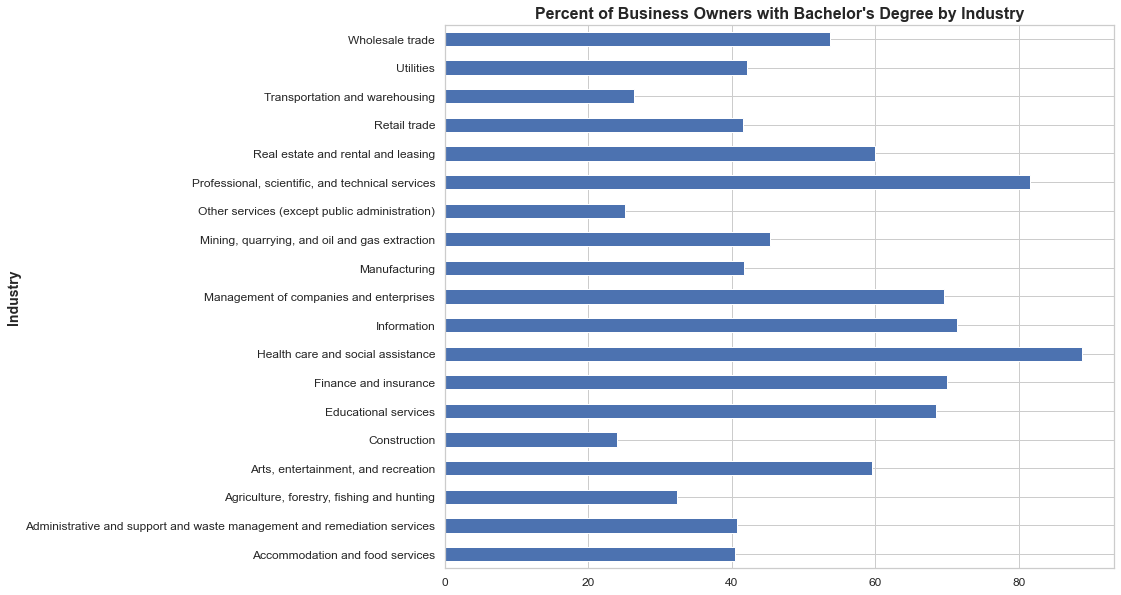

In [561]:
sns.set_theme(style='whitegrid')
ax = df_owner_ba_above.plot(kind='barh', x='Industry', figsize= (12,10), legend=False)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(12)
ax.set_ylabel('Industry', fontsize=14, fontweight= 'bold')
plt.get_cmap('tab10')
plt.title('Percent of Business Owners with Bachelor\'s Degree by Industry', fontsize = 16, fontweight= 'bold')


In [356]:
df_business_merge = df_business.groupby(['Industry'], as_index=False)['AnnualPayroll'].sum().copy()

In [357]:
df_business_merge = df_business_merge[df_business_merge['Industry'] != 'Total for all sectors'] 
df_business_merge = df_business_merge[df_business_merge['Industry'] != 'Industries not classified']

In [358]:
df_owner_business_merge = df_owner_ba_above.merge(df_business_merge, how='inner', on='Industry')

In [359]:
df_owner_business_merge = df_owner_business_merge[['Industry', 'SumPercentOwners', 'AnnualPayroll']]

In [360]:
df_owner_business_merge.AnnualPayroll = df_owner_business_merge.AnnualPayroll / 5.0e08

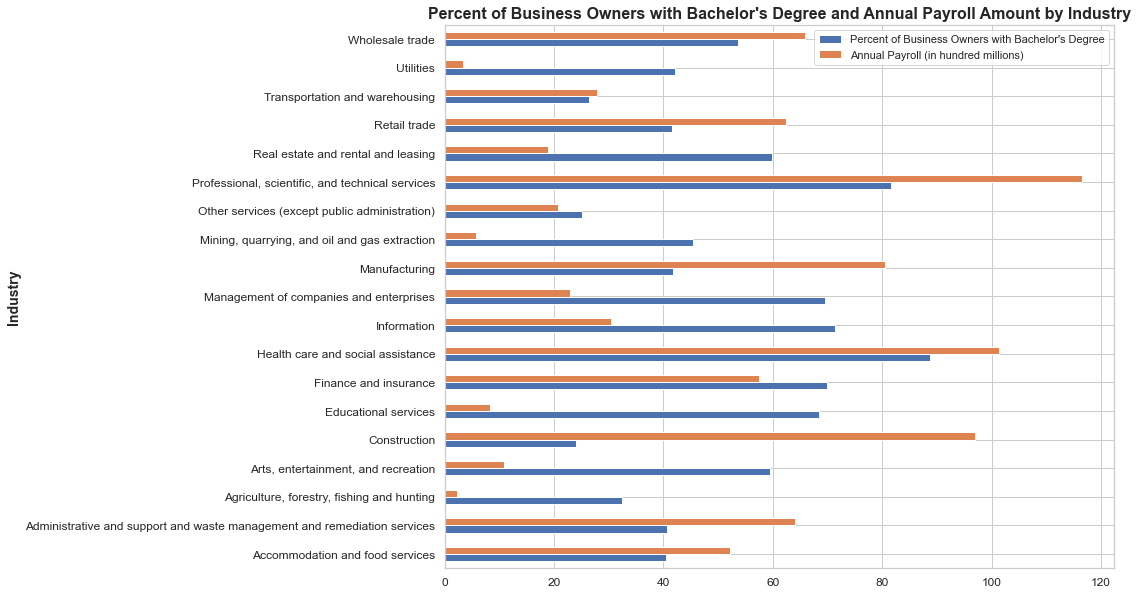

In [557]:
sns.set_theme(style='whitegrid')
ax = df_owner_business_merge.plot(kind='barh', x='Industry', figsize= (12,10))
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(12)
ax.set_ylabel('Industry', fontsize=14, fontweight= 'bold')
plt.title('Percent of Business Owners with Bachelor\'s Degree and Annual Payroll Amount by Industry', fontsize = 16, fontweight= 'bold')
plt.get_cmap('tab10')
plt.legend(['Percent of Business Owners with Bachelor\'s Degree', 'Annual Payroll (in hundred millions)'],loc='upper right')




In [372]:
rgba = plt.cm.get_cmap(str("tab10"))(0)

clr = colors.rgb2hex(rgba)

clr

'#1f77b4'

Text(0.5, 1.0, "Percent of Business Owners with a Bachelor's Degree vs. Annual Payroll Amount by Industry")

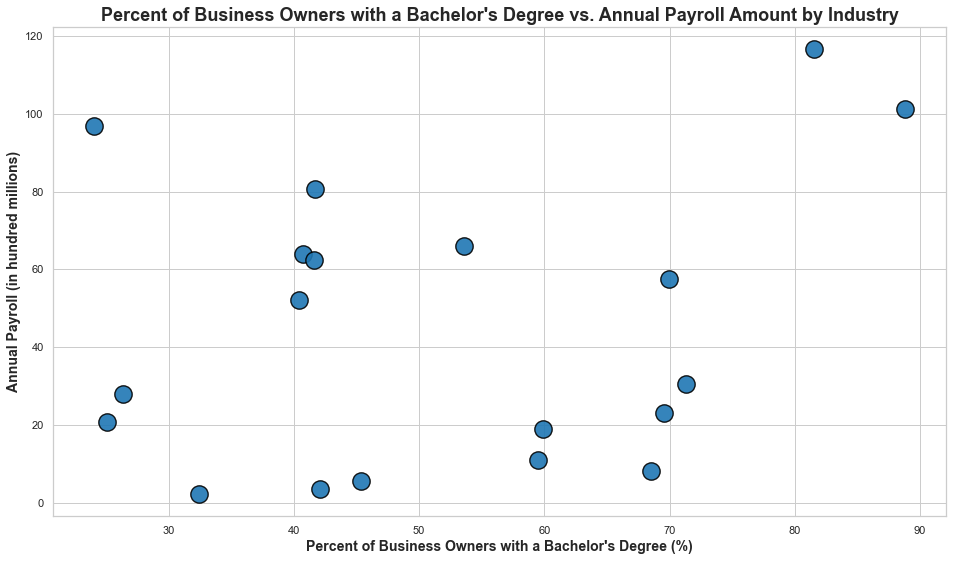

In [541]:
sns.set_theme(style='whitegrid')
plt.figure(figsize = (16,9))
sns.scatterplot(x='SumPercentOwners',
                y='AnnualPayroll',
                data=df_owner_business_merge,
                s=300,
                color='#1f77b4',
               alpha=0.9,
               edgecolor='black')

plt.xlabel('Percent of Business Owners with a Bachelor\'s Degree (%)', fontsize = 14, fontweight= 'bold')
plt.ylabel('Annual Payroll (in hundred millions)', fontsize = 14, fontweight= 'bold')
plt.title('Percent of Business Owners with a Bachelor\'s Degree vs. Annual Payroll Amount by Industry', fontsize=18, fontweight= 'bold')





In [405]:
df_owner_all= df_owner_grouped[df_owner_grouped['Industry'] == 'Total for all sectors']

In [407]:
df_owner_all = df_owner_all[['OwnerCharacteristic', 'PercentOwners']]

In [450]:
edu_list = list(df_owner_all.OwnerCharacteristic.unique())


Text(0.5, 1.0, 'Overall Percent of Business Owners by Highest Education Attainment')

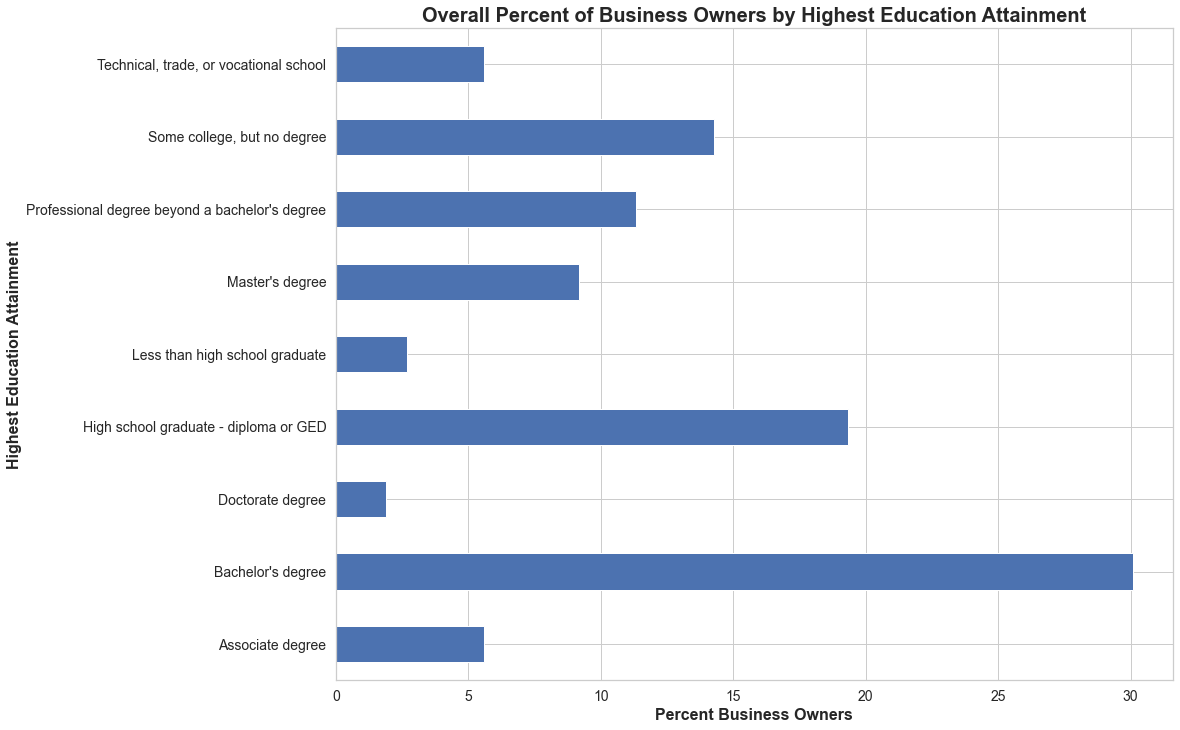

In [520]:
sns.set_theme(style='whitegrid')
plt.get_cmap('tab10')
ax = df_owner_all.plot(kind='barh', x='OwnerCharacteristic', figsize= (15,12), legend=False)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(14)
ax.set_xlabel('Percent Business Owners', fontsize=16, fontweight='bold')
ax.set_ylabel('Highest Education Attainment', fontsize=16, fontweight='bold')
plt.title('Overall Percent of Business Owners by Highest Education Attainment', fontsize = 20, fontweight= 'bold')


In [487]:
df_owner_ba= df_owner_grouped.copy()
industry_list = list(df_owner_ba.Industry.unique())
len(industry_list)

21

In [569]:
table2 = df_owner_ba.groupby(['Industry'])['PercentOwners'].apply(list).copy()
table2 = pd.DataFrame({'Industry': table2.index, 'PercentOwners': table2.values})


,Industry,PercentOwners
0,Accommodation and food services,"[6.199404996621711, 29.975506103497796, 0.9425..."
1,Administrative and support and waste managemen...,"[7.332715476113941, 30.713879699889436, 0.5321..."
2,"Agriculture, forestry, fishing and hunting","[6.313827134248546, 25.270026082761664, 0.0, 3..."
3,"Arts, entertainment, and recreation","[4.9631716688932075, 42.86530511877124, 1.4476..."
4,Construction,"[6.641327767782858, 19.78418084720573, 0.13920..."
5,Educational services,"[5.705811712604909, 38.18901029113456, 5.24167..."
6,Finance and insurance,"[5.238593526111277, 52.28974109478772, 0.92700..."
7,Health care and social assistance,"[2.917310877993816, 11.228587051974772, 7.8215..."
8,Industries not classified,"[9.986772992438434, 24.16948919284671, 0.43427..."
9,Information,"[4.121437360476657, 49.356118362759126, 2.7801..."


In [570]:
table2 = pd.DataFrame(table2['PercentOwners'].to_list(), columns=edu_list)

In [571]:
table2 = table2.astype(float)

In [572]:
table2['Industry'] = industry_list

In [573]:
table2 = table2[table2['Industry'] != 'Total for all sectors']


In [574]:
table2 = table2[table2['Industry'] != 'Industries not classified']


In [575]:
industry_values = ['Construction', 'Other services (except public administration)', 'Transportation and warehousing', 'Health care and social assistance', 'Professional, scientific, and technical services', 'Information']

In [576]:
table2 = table2[table2['Industry'].isin(industry_values)]

In [579]:
table2 = table2.reindex([4, 18, 13, 9, 14, 7])

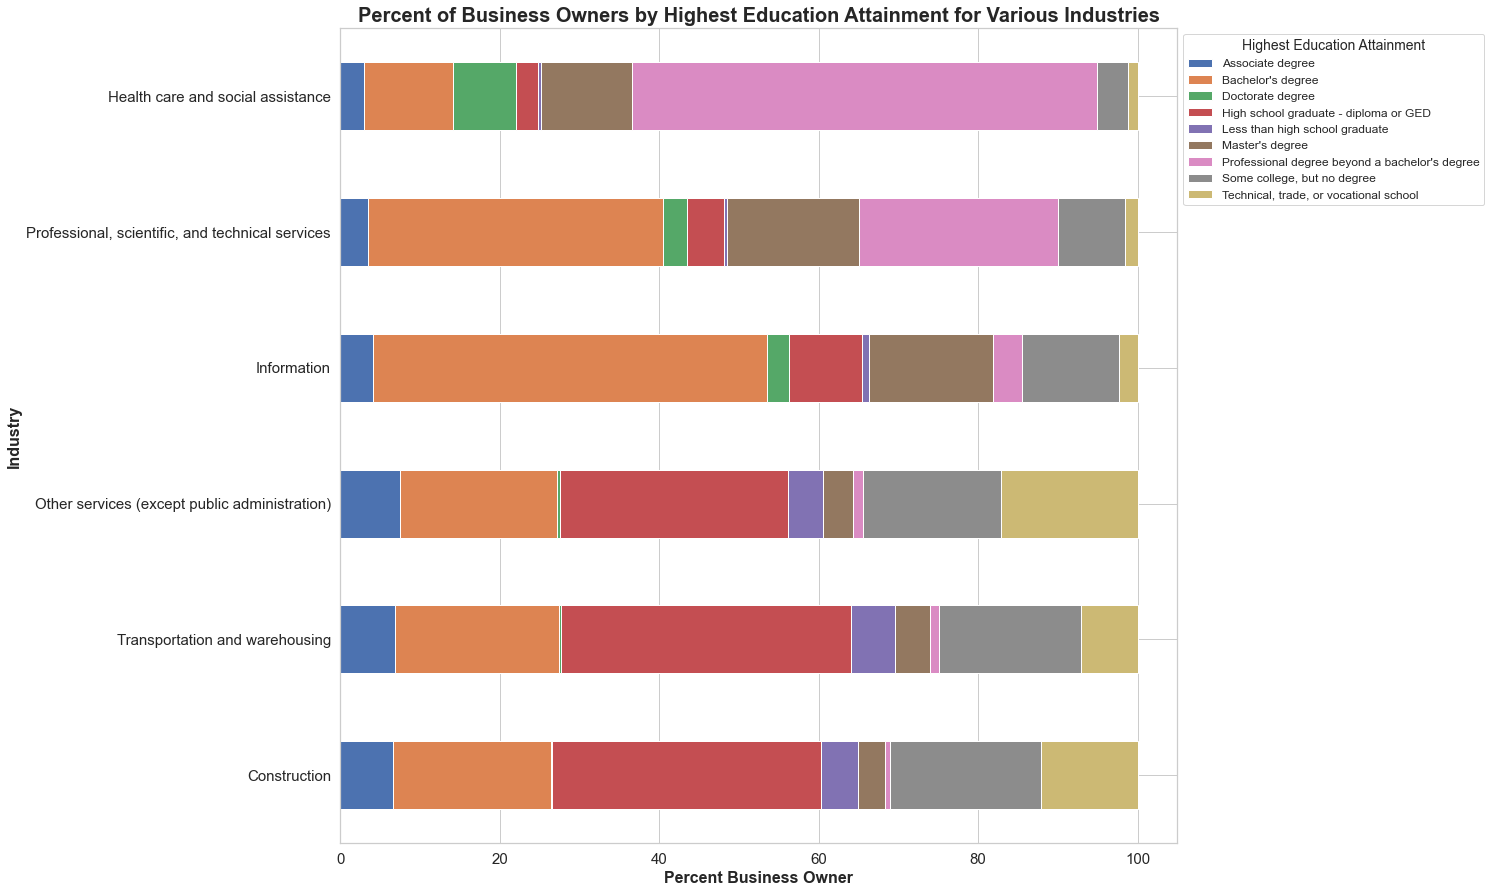

In [582]:
sns.set_theme(style='whitegrid')
ax = table2.plot(kind='barh', stacked=True, x='Industry', figsize= (15,15))
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
ax.set_ylabel('Industry', fontsize=16, fontweight = 'bold')
ax.set_xlabel('Percent Business Owner', fontsize=16, fontweight = 'bold')
plt.get_cmap('tab10')
plt.title('Percent of Business Owners by Highest Education Attainment for Various Industries', fontsize = 20, fontweight = 'bold')
plt.legend(title='Highest Education Attainment', title_fontsize= 14, bbox_to_anchor=(1.0, 1.0), prop={'size': 12})

